In [1]:
# import sys
# !{sys.executable} -m pip install tensorflow 


In [2]:
import tensorflow as tf
print(tf.__version__)

2.13.0


In [3]:
import numpy as np
import cv2
import matplotlib as plt
from matplotlib.pyplot import imshow



In [4]:
mnist = tf.keras.datasets.mnist
(x_train,y_train) , (x_test,y_test) = mnist.load_data()
 
x_train = tf.keras.utils.normalize(x_train,axis=1)
x_test = tf.keras.utils.normalize(x_test,axis=1)

In [11]:
 
model = tf.keras.Sequential()
#     tf.keras.layers.RandomFlip("horizontal_and_vertical"),
#     tf.keras.layers.RandomRotation(0.2),

#     tf.keras.layers.RandomBrightness(
#         0.2, value_range=(0, 255), seed=4
#     )
# ])


model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
 
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))
 
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )
model.fit(x_train,y_train,epochs=5)

model.save_weights("saved")



Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2587 - accuracy: 0.9246
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1035 - accuracy: 0.9682
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0708 - accuracy: 0.9782
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0513 - accuracy: 0.9836
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0404 - accuracy: 0.9869


(28, 28) <class 'numpy.ndarray'>


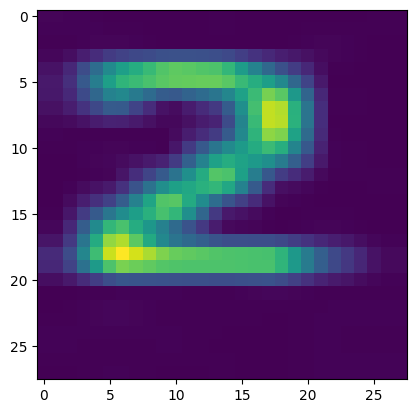

In [6]:
image = cv2.imread("002.jpeg", )
image = cv2.cvtColor( image , cv2.COLOR_BGR2GRAY)
image = cv2.resize(image , (28,28))
image = np.asanyarray(image)
print(image.shape, type(image))
imshow(image)
test = np.array([image,])

In [7]:
test.shape

(1, 28, 28)

In [8]:
predictions=model.predict(test)
print('prediction -> ', np.argmax(predictions))


1/1 [==============================] - 0s 70ms/step
prediction ->  3


(28, 28) <class 'numpy.ndarray'>


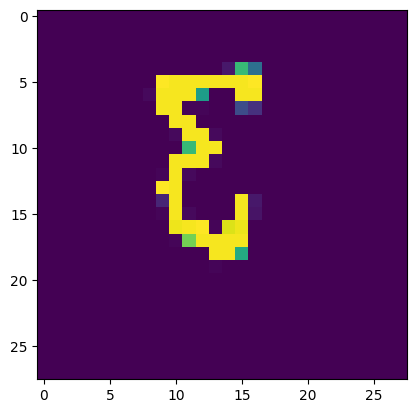

In [9]:
image = cv2.imread("Screenshot.jpeg", )
image = cv2.cvtColor( image , cv2.COLOR_BGR2GRAY)
image = cv2.resize(image , (28,28))
image = np.asanyarray(image)
print(image.shape, type(image))
imshow(image)
test = np.array([image,])

In [10]:
predictions=model.predict(test)
print('prediction -> ', np.argmax(predictions))

1/1 [==============================] - 0s 17ms/step
prediction ->  6


In [ ]:
secondary = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.2),

    tf.keras.layers.RandomBrightness(
        0.2, value_range=(0, 255), seed=4
    )
])


secondary.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
 
secondary.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
secondary.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
secondary.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))
 
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )
model.fit(x_train,y_train,epochs=5)